In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import gzip

In [2]:
df1 = pd.read_csv('bom.movie_gross.csv.gz')

In [3]:
df2 = pd.read_csv('imdb.name.basics.csv.gz')

In [114]:
df3 = pd.read_csv('imdb.title.akas.csv.gz')
df3 = df3.rename(columns = {'title_id':'tconst'})
BigFrame = pd.concat([df1, df3, df4, df7, df8, df9, df10, df11])
BigFrame.keys()

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year', 'tconst',
       'ordering', 'region', 'language', 'types', 'attributes',
       'is_original_title', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes', 'synopsis',
       'rating', 'genre', 'director', 'writer', 'theater_date', 'dvd_date',
       'currency', 'box_office', 'runtime', 'review', 'fresh', 'critic',
       'top_critic', 'publisher', 'date', 'genre_ids', 'id',
       'original_language', 'popularity', 'release_date', 'vote_average',
       'vote_count', 'movie', 'production_budget', 'worldwide_gross'],
      dtype='object')

In [120]:
d = {'title': 'first', 'movie': 'first', 'domestic_gross': 'sum', 'foreign_gross': 'sum', 'worldwide_gross': 'sum', 'primary_title': 'first', 'original_title': 'first', 'production_budget': 'first', 'region': 'first', 'genres': 'first', 'runtime_minutes': 'sum'}
NewFrame = BigFrame.groupby(BigFrame['movie']).aggregate(d)
NewFrame

,title,movie,domestic_gross,foreign_gross,worldwide_gross,primary_title,original_title,production_budget,region,genres,runtime_minutes
movie,,,,,,,,,,,
#Horror,None,#Horror,0.0,0,0.0,None,None,"$1,500,000",None,None,0.0
(500) Days of Summer,None,(500) Days of Summer,32425665.0,0,34439060.0,None,None,"$7,500,000",None,None,0.0
10 Cloverfield Lane,None,10 Cloverfield Lane,72082999.0,0,108286422.0,None,None,"$5,000,000",None,None,0.0
10 Days in a Madhouse,None,10 Days in a Madhouse,14616.0,0,14616.0,None,None,"$12,000,000",None,None,0.0
10 Things I Hate About You,None,10 Things I Hate About You,38177966.0,0,60413950.0,None,None,"$13,000,000",None,None,0.0
...,...,...,...,...,...,...,...,...,...,...,...
mother!,None,mother!,17800004.0,0,42531076.0,None,None,"$30,000,000",None,None,0.0
xXx,None,xXx,141930000.0,0,267200000.0,None,None,"$70,000,000",None,None,0.0
xXx: Return of Xander Cage,None,xXx: Return of Xander Cage,44898413.0,0,345033359.0,None,None,"$85,000,000",None,None,0.0


In [43]:
df4 = pd.read_csv('imdb.title.basics.csv.gz')

In [6]:
df5 = pd.read_csv('imdb.title.crew.csv.gz')

In [7]:
df6 = pd.read_csv('imdb.title.principals.csv.gz')

In [38]:
df7 = pd.read_csv('imdb.title.ratings.csv.gz')

In [62]:
df8 = pd.read_csv('rt.movie_info.tsv.gz', sep='\t')
df8 = df8.set_index('id')
df8 = df8.sort_values(by='box_office', ascending=False)

In [10]:
df9 = pd.read_csv('rt.reviews.tsv.gz', sep='\t', encoding='windows-1254')
df9 = df9.set_index('id')

In [11]:
df10 = pd.read_csv('tmdb.movies.csv.gz')
df10 = df10.set_index(['Unnamed: 0'])

In [123]:
df11 = pd.read_csv('tn.movie_budgets.csv.gz')
#df11 = df11.set_index('id')
df11['worldwide_gross'] = df11['worldwide_gross'].str[1:]
df11['worldwide_gross'] = df11['worldwide_gross'].str.replace(',', '').astype(int)
df11['domestic_gross'] = df11['domestic_gross'].str[1:]
df11['domestic_gross'] = df11['domestic_gross'].str.replace(',', '').astype(int)
df11['production_budget'] = df11['production_budget'].str[1:]
df11['production_budget'] = df11['production_budget'].str.replace(',', '').astype(int)
df11.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [118]:
print('DF1:', df1.columns, '\n')
print('DF3: ', df3.columns, '\n')
print('DF4: ', df4.columns, '\n')
print('DF5: ', df5.columns, '\n')
print('DF8: ', df8.columns, '\n')
print('DF9: ', df9.columns, '\n')
print('DF10: ', df10.columns, '\n')
print('DF11: ', df11.columns, '\n')

DF1: Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object') 

DF3:  Index(['tconst', 'ordering', 'title', 'region', 'language', 'types',
       'attributes', 'is_original_title'],
      dtype='object') 

DF4:  Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object') 

DF5:  Index(['tconst', 'directors', 'writers'], dtype='object') 

DF8:  Index(['synopsis', 'rating', 'genre', 'director', 'writer', 'theater_date',
       'dvd_date', 'currency', 'box_office', 'runtime', 'studio'],
      dtype='object') 

DF9:  Index(['review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
       'date'],
      dtype='object') 

DF10:  Index(['genre_ids', 'id', 'original_language', 'original_title', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object') 

DF11:  Index(['release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross

In [111]:
df1.head()


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [15]:
df2.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [16]:
df3.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [17]:
df4.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [112]:
df5.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [18]:
df6.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [19]:
df7.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [20]:
df8.head()

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
23,A fictional film set in the alluring world of ...,R,Drama,NaN,NaN,"Dec 20, 2013","Mar 18, 2014",$,"99,165,609",129 minutes,Sony Pictures
1944,"In the 3D action-comedy The Green Hornet, Brit...",PG-13,Action and Adventure|Comedy|Science Fiction an...,Michel Gondry,Evan Goldberg|Seth Rogen,"Jan 14, 2011","May 3, 2011",$,"98,000,000",119 minutes,Sony Pictures
274,Natalie Portman stars in this western concerni...,R,Action and Adventure|Drama|Western,NaN,NaN,"Jan 29, 2016","Apr 26, 2016",$,"976,847",97 minutes,NaN
1890,A misplaced sausage and his savory friends emb...,R,Animation|Comedy,Conrad Vernon|Greg Tiernan,Kyle Hunter|Ariel Shaffir|Seth Rogen|Evan Gold...,"Aug 12, 2016","Nov 8, 2016",$,"97,661,826",89 minutes,Sony Pictures
1711,"Directed by Garry Marshall, The Princess Diari...",G,Comedy|Kids and Family,Garry Marshall,Shonda Rhimes,"Aug 11, 2004","Dec 14, 2004",$,"95,111,012",113 minutes,NaN


In [21]:
df9.head()

,review,rating,fresh,critic,top_critic,publisher,date
id,,,,,,,
3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [22]:
df10.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
Unnamed: 0,,,,,,,,,
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [65]:
df11.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625",2.776345e+09
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875",1.045664e+09
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350",1.497624e+08
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868",1.403014e+09
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382",1.316722e+09


In [24]:
df1drop = df1.dropna()
df2drop = df2.dropna()
df3drop = df3.dropna()
df4drop = df4.dropna()
df5drop = df5.dropna()
df6drop = df6.dropna()
df7drop = df7.dropna()
df8drop = df8.dropna()
df9drop = df9.dropna()
df10drop = df10.dropna()
df11drop = df11.dropna()


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


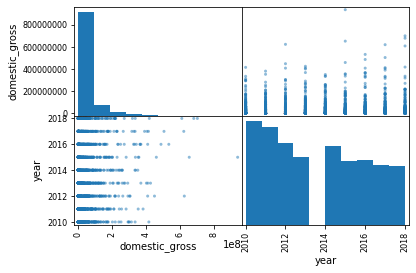

In [25]:
pd.plotting.scatter_matrix(df1drop);

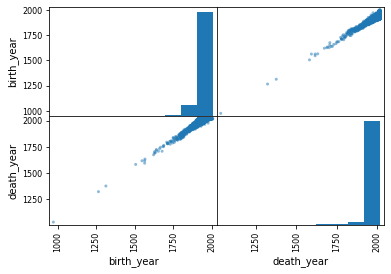

In [26]:
pd.plotting.scatter_matrix(df2drop);

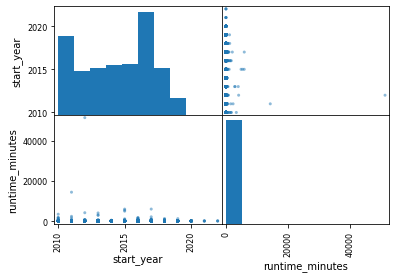

In [27]:
pd.plotting.scatter_matrix(df4drop);

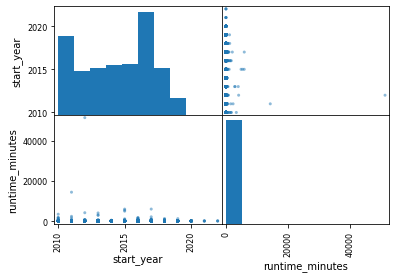

In [28]:
pd.plotting.scatter_matrix(df4drop);

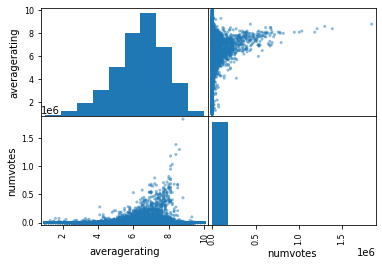

In [29]:
pd.plotting.scatter_matrix(df7drop);

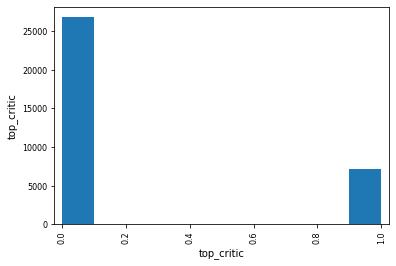

In [30]:
pd.plotting.scatter_matrix(df9drop);

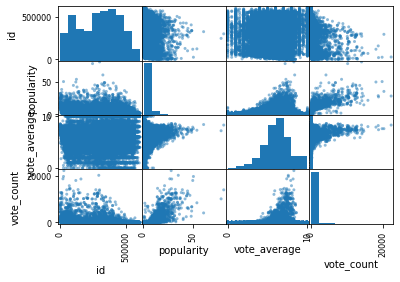

In [31]:
pd.plotting.scatter_matrix(df10drop);

In [33]:
df8[:10]

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
23,A fictional film set in the alluring world of ...,R,Drama,NaN,NaN,"Dec 20, 2013","Mar 18, 2014",$,"99,165,609",129 minutes,Sony Pictures
1944,"In the 3D action-comedy The Green Hornet, Brit...",PG-13,Action and Adventure|Comedy|Science Fiction an...,Michel Gondry,Evan Goldberg|Seth Rogen,"Jan 14, 2011","May 3, 2011",$,"98,000,000",119 minutes,Sony Pictures
274,Natalie Portman stars in this western concerni...,R,Action and Adventure|Drama|Western,NaN,NaN,"Jan 29, 2016","Apr 26, 2016",$,"976,847",97 minutes,NaN
1890,A misplaced sausage and his savory friends emb...,R,Animation|Comedy,Conrad Vernon|Greg Tiernan,Kyle Hunter|Ariel Shaffir|Seth Rogen|Evan Gold...,"Aug 12, 2016","Nov 8, 2016",$,"97,661,826",89 minutes,Sony Pictures
1711,"Directed by Garry Marshall, The Princess Diari...",G,Comedy|Kids and Family,Garry Marshall,Shonda Rhimes,"Aug 11, 2004","Dec 14, 2004",$,"95,111,012",113 minutes,NaN
1055,The grim futility of the war between Bosnia an...,R,Art House and International|Drama,Danis Tanovic,Danis Tanovic,"Dec 21, 2001","Apr 9, 2002",$,"948,054",98 minutes,United Artists Pictures
99,A woman finds herself attempting to foil one o...,PG-13,Comedy|Romance,NaN,NaN,"Dec 20, 2002","Apr 29, 2003",$,"93,300,000",102 minutes,Warner Bros.
1317,"For an awkward, self-conscious girl like Kiki,...",PG-13,Comedy|Drama|Romance,Joe Roth,Donna Roth|Billy Crystal|Peter Tolan,"Jul 20, 2001","Nov 13, 2001",$,"93,008,426",103 minutes,Columbia Pictures
1884,What do you get when you mix fearless comedic ...,PG-13,Comedy,David Zucker,Craig Mazin|David Zucker,"Apr 14, 2006","Aug 15, 2006",$,"90,672,025",83 minutes,Weinstein Co.


In [34]:
df9


,review,rating,fresh,critic,top_critic,publisher,date
id,,,,,,,
3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...
2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
